In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from scipy.stats import gaussian_kde
#import mpl_scatter_density
import calendar
import seaborn as sns
from scipy.stats import linregress

In [2]:
sf=np.loadtxt('sfu.txt', skiprows=4, unpack=False)
sf=pd.DataFrame(sf)
sf.columns=['YEAR','DOY','HR','F10.7']
sf

,YEAR,DOY,HR,F10.7
0,2020.0,1.0,0.0,69.4
1,2020.0,2.0,0.0,69.5
2,2020.0,3.0,0.0,68.9
3,2020.0,4.0,0.0,69.8
4,2020.0,5.0,0.0,69.4
...,...,...,...,...
1091,2022.0,361.0,0.0,153.8
1092,2022.0,362.0,0.0,155.1
1093,2022.0,363.0,0.0,157.4
1094,2022.0,364.0,0.0,172.4


In [3]:
sf['Date']=pd.to_datetime(sf['YEAR'] * 1000 + sf['DOY'], format='%Y%j').dt.date

In [4]:
sf.set_index('Date',inplace=True)
sf=sf[sf['F10.7']<400]

In [5]:
scint1=pd.read_csv('2020/percent_year2020.csv')
scint2=pd.read_csv('2021/percent_year2021.csv')
scint3=pd.read_csv('2022/percent_year2022.csv')

In [6]:
scint=pd.concat([scint1,scint2,scint3],axis=0)
scint.columns=['Date','Count']


In [7]:
scint['Date']=pd.to_datetime(scint['Date']).dt.date

In [8]:
scint.set_index('Date',inplace=True)

In [9]:
temp=pd.concat([sf,scint],axis=1)
corr = temp['F10.7'].corr(temp['Count'])
print( f"Corr ={corr}")
del temp['YEAR']
del temp['HR']
temp['Month'] = pd.DatetimeIndex(temp.index).month
dff=temp.groupby('Month')

Corr =0.14100398762578265


In [10]:
plt.rcParams['ytick.minor.visible'] =True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['font.size'] = '16'
plt.rcParams['font.family'] = 'serif'

plt.rcParams['legend.fontsize'] = '10'
plt.rcParams['legend.borderaxespad'] = '1.9'
#plt.rcParams['legend.numpoints'] = '1'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['xtick.major.size'] = '5'
plt.rcParams['xtick.minor.size'] = '3'
plt.rcParams['xtick.major.width'] = '2'
plt.rcParams['xtick.minor.width'] = '1'
plt.rcParams['ytick.major.size'] = '5'
plt.rcParams['ytick.minor.size'] = '3'
plt.rcParams['ytick.major.width'] = '2'
plt.rcParams['ytick.minor.width'] = '1'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['axes.labelpad'] = '10.0'
plt.rcParams['lines.dashed_pattern']=3.0, 1.4
#plt.rcParams['axes.formatter.limits']=-10,10
plt.rcParams['lines.dotted_pattern']= 1.0, 0.7

plt.rcParams['xtick.labelsize'] = '12'
plt.rcParams['ytick.labelsize'] = '12'
plt.rcParams['axes.labelsize'] = '16'
plt.rcParams['axes.labelsize'] = '16'
plt.rcParams['axes.labelweight'] = 'bold'

plt.rcParams['xtick.major.pad']='10'
plt.rcParams['xtick.minor.pad']='10'
plt.rcParams['hatch.color'] = 'black'
plt.rc('axes', linewidth=2)

<ipython-input-22-c0a6f810eda2>:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


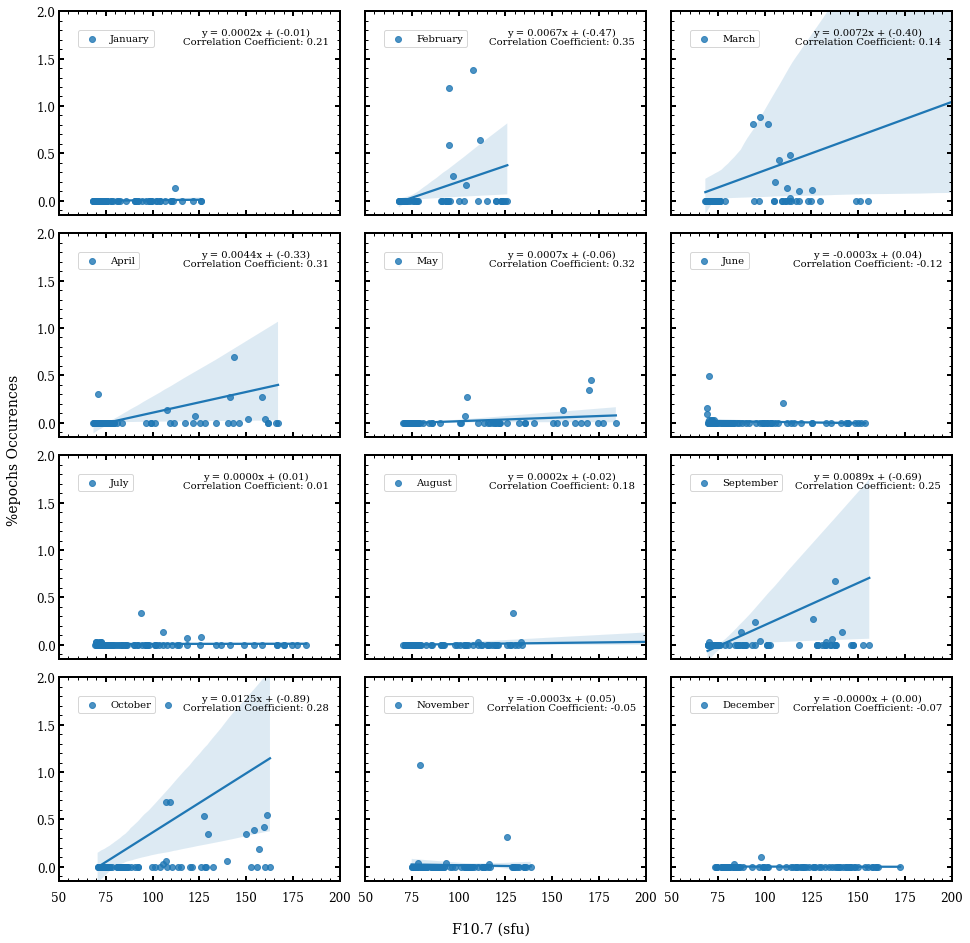

In [22]:
# Define the width and height spacing between subplots
wspace = 0.09  # Adjust this value to decrease or increase horizontal spacing
hspace = 0.09  # Adjust this value to decrease or increase vertical spacing


fig, ax = plt.subplots(4, 3, sharey=True, sharex=True, figsize=(16, 16),gridspec_kw={'wspace': wspace, 'hspace': hspace})
ax = ax.flatten()

i = 1  # Start at 1 because the first month is January
#dff = temp.groupby('Month')
font_size = 14
font_family = 'serif'  
fig.text(0.5, 0.08, 'F10.7 (sfu)', ha='center', fontsize=font_size, fontfamily=font_family)
fig.text(0.08, 0.5, '%epochs Occurences', va='center', rotation='vertical',fontsize=font_size, fontfamily=font_family)
for j in range(4):
    for k in range(3):
        if i <= len(dff):  # Make sure you don't access more subplots than available groups
            df = dff.get_group(i)
            df=df.dropna()
            corr_cof=df['Count'].corr(df['F10.7'])
            sns.regplot(x='F10.7', y='Count', data=df, ax=ax[j * 3 + k],label=calendar.month_name[i])
            # Calculate the regression line 
            slope, intercept, r_value, p_value, std_err = linregress(df['F10.7'],df['Count'])
            # Add equation of the line to the plot 
            equation = f'y = {slope:.4f}x + ({intercept:.2f})'
            corr_text = f'Correlation Coefficient: {corr_cof:.2f}'
            ax[j * 3 + k].set_ylim(-0.15,2)
            ax[j * 3 + k].set_xlim(50,200)
            ax[j * 3 + k].set_xlabel('')
            ax[j * 3 + k].set_ylabel('')
            ax[j * 3 + k].legend(loc=2)
            ax[j * 3 + k].text(155, 1.75, equation, ha='center')
            ax[j * 3 + k].text(155, 1.65, corr_text, ha='center')
            i += 1

plt.tight_layout()
plt.savefig('regplot_sf_percent_scint1.pdf',facecolor='white', dpi=200, bbox_inches='tight')
plt.show()


In [12]:
df['F10.7'].to_numpy()

array([101.2, 101.9,  99.9,  93. ,  97. ,  88.2,  86.8,  80. ,  79.6,
        79.1,  80.8,  79.3,  78.1,  80.4,  80.3,  79.3,  79.1,  77.9,
        79.1,  81.1,  77. ,  83. ,  83.6,  84.5,  84.9,  85. ,  84.9,
        84.3,  81.4,  80.1,  78.5,  84. ,  84.2,  82.9,  85.6,  80.3,
        77.6,  76.6,  74.6,  74.4,  73.4,  73.9,  77.4,  78.2,  86.2,
        99.3, 114.2, 117. , 117.4, 111.6, 118.8, 132.2, 135.8, 125.6,
       122.1, 126.5, 121.2, 119.9, 116.5, 107.8,  99. ,  98.2, 115.4,
       120.6, 130. , 139.6, 145.4, 140. , 143.6, 138.8, 144.6, 137.4,
       143.2, 146.2, 148.3, 159.6, 160.7, 158. , 149.7, 147.5, 141.7,
       134.2, 127. , 123.6, 129. , 139.3, 145.5, 153.8, 155.1, 157.4,
       172.4, 159.5])

In [13]:
linregress(df['F10.7'],df['Count'])

LinregressResult(slope=-2.421553826545145e-05, intercept=0.004062249033423011, rvalue=-0.06512284729341591, pvalue=0.5373988559358214, stderr=3.911259358193465e-05, intercept_stderr=0.004403020996008801)

In [14]:
slope, intercept, r_value, p_value, std_err

(-2.421553826545145e-05,
 0.004062249033423011,
 -0.06512284729341591,
 0.5373988559358214,
 3.911259358193465e-05)

In [15]:
df['Count'].corr(df['F10.7'])

-0.06512284729341591

In [16]:
error

NameError: name 'error' is not defined

In [ ]:
# Define the width and height spacing between subplots
wspace = 0.09  # Adjust this value to decrease or increase horizontal spacing
hspace = 0.09  # Adjust this value to decrease or increase vertical spacing


fig, ax = plt.subplots(4, 3, sharey=True, sharex=True, figsize=(12, 12),gridspec_kw={'wspace': wspace, 'hspace': hspace})
ax = ax.flatten()

i = 1  # Start at 1 because the first month is January
#dff = temp.groupby('Month')
font_size = 14
font_family = 'serif'  
fig.text(0.5, 0.06, 'F10.7', ha='center', fontsize=font_size, fontfamily=font_family)
fig.text(0.06, 0.5, '%epochs Occurences', va='center', rotation='vertical',fontsize=font_size, fontfamily=font_family)
for j in range(4):
    for k in range(3):
        if i <= len(dff):  # Make sure you don't access more subplots than available groups
            df = dff.get_group(i)
            ax[j * 3 + k].scatter(df['F10.7'],df['Count'],label=calendar.month_name[i])
            ax[j * 3 + k].set_ylim(0,2)
            ax[j * 3 + k].set_xlim(50,200)
            ax[j * 3 + k].set_xlabel('')
            ax[j * 3 + k].set_ylabel('')
            ax[j * 3 + k].legend(loc=2)
            i += 1

plt.tight_layout()
#plt.savefig('scatterplot_sf_percent_scint.png',facecolor='white', dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
#%matplotlib inline
fig.text(0.5, 0.06, 'F10.7', ha='center', fontsize=font_size, fontfamily=font_family)
fig.text(0.06, 0.5, '%epochs Occurences', va='center', rotation='vertical',fontsize=font_size, fontfamily=font_family)
temp1=temp[temp.DOY.between(36,126,inclusive='both')|temp.DOY.between(221,311,inclusive='both')]
temp1=temp1[temp1['F10.7']<200]
temp1['countroot']=temp1['Count']**0.5
sns.regplot(x='F10.7', y='countroot', data=temp1)
print(plt.gca().lines[0].get_data())
plt.show()
#plt.scatter(temp1['F10.7'],temp1['Count'])
#plt.show()

In [ ]:
temp1